In [1]:
# Importing required libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.style.use('seaborn-darkgrid')


<ipython-input-1-d40fc580a8de>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [2]:
#AAPL for Apple Inc.
stock_symbol = "AAPL"
start_date = "2024-01-01"
end_date = "2024-09-30"

# Downloading stock data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
stock_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2024-01-02 00:00:00+00:00,184.938217,185.639999,188.440002,183.889999,187.149994,82488700
2024-01-03 00:00:00+00:00,183.553467,184.250000,185.880005,183.429993,184.220001,58414500
2024-01-04 00:00:00+00:00,181.222336,181.910004,183.089996,180.880005,182.149994,71983600
2024-01-05 00:00:00+00:00,180.495071,181.179993,182.759995,180.169998,181.990005,62303300
2024-01-08 00:00:00+00:00,184.858521,185.559998,185.600006,181.500000,182.089996,59144500


In [3]:
# Check the data types and structure
stock_data.info()

# Summary statistics
stock_data.describe()

# Check for missing values
stock_data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 2024-01-02 00:00:00+00:00 to 2024-09-27 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  187 non-null    float64
 1   (Close, AAPL)      187 non-null    float64
 2   (High, AAPL)       187 non-null    float64
 3   (Low, AAPL)        187 non-null    float64
 4   (Open, AAPL)       187 non-null    float64
 5   (Volume, AAPL)     187 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 10.2 KB


,,0
Price,Ticker,
Adj Close,AAPL,0
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0


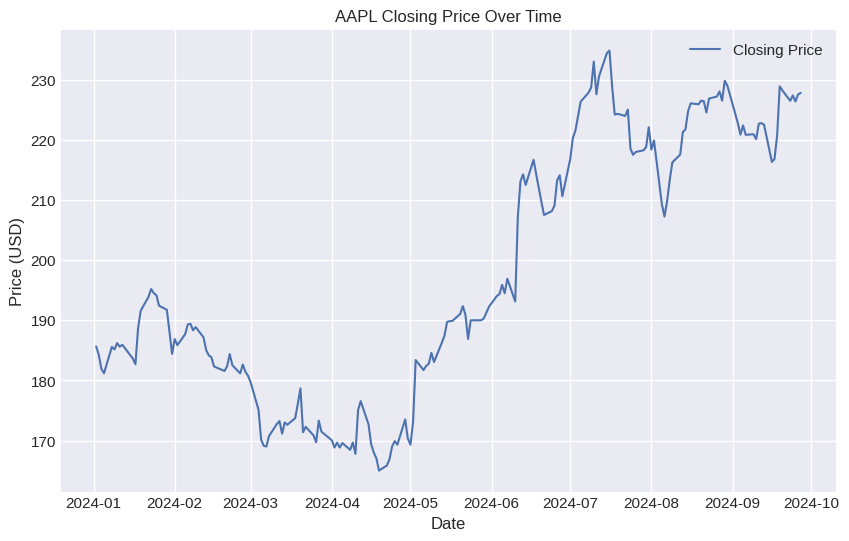

In [5]:
# Plot the closing price
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Closing Price')
plt.title(f'{stock_symbol} Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

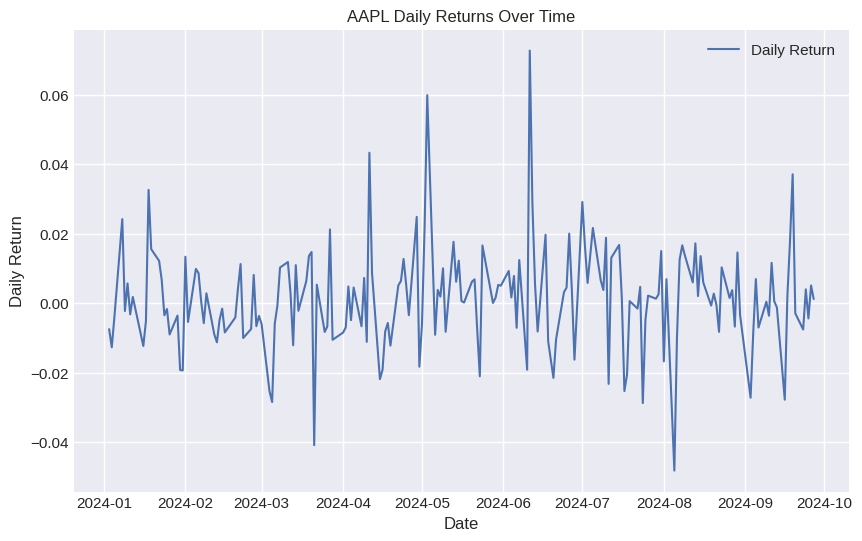

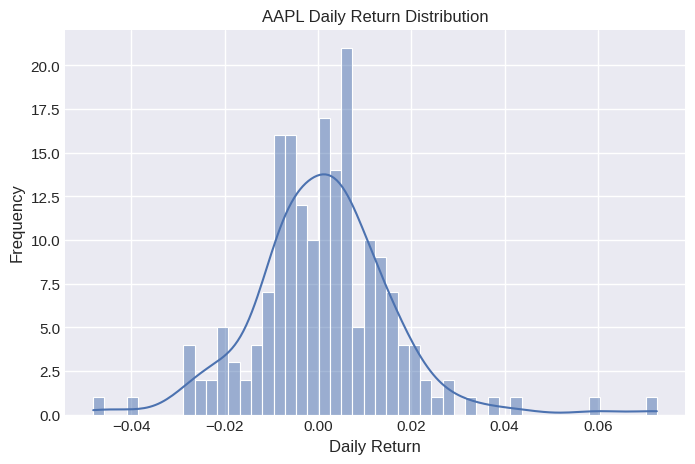

In [6]:
# Calculate daily returns
stock_data['Daily Return'] = stock_data['Close'].pct_change()

# Plot the daily returns
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Daily Return'], label='Daily Return')
plt.title(f'{stock_symbol} Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

# Plot the distribution of daily returns
plt.figure(figsize=(8, 5))
sns.histplot(stock_data['Daily Return'].dropna(), bins=50, kde=True)
plt.title(f'{stock_symbol} Daily Return Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

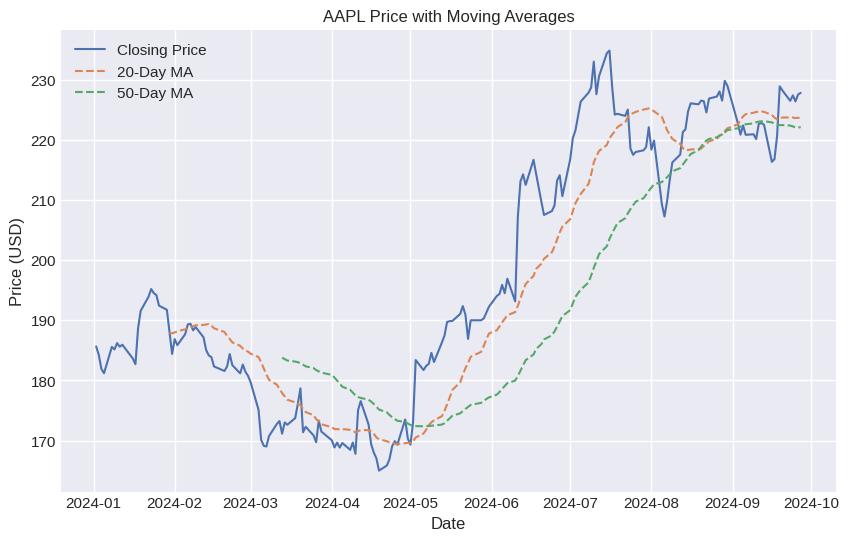

In [7]:
# Calculate moving averages (e.g., 20-day and 50-day)
stock_data['20 Day MA'] = stock_data['Close'].rolling(window=20).mean()
stock_data['50 Day MA'] = stock_data['Close'].rolling(window=50).mean()

# Plot the closing price along with moving averages
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Closing Price')
plt.plot(stock_data['20 Day MA'], label='20-Day MA', linestyle='--')
plt.plot(stock_data['50 Day MA'], label='50-Day MA', linestyle='--')
plt.title(f'{stock_symbol} Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

[*********************100%***********************]  3 of 3 completed


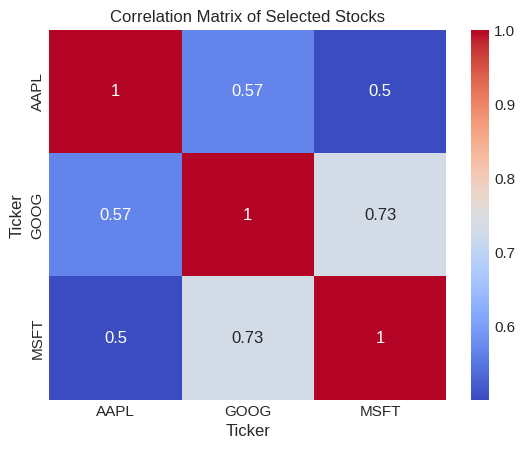

In [8]:
# Define multiple stock symbols
symbols = ["AAPL", "MSFT", "GOOG"]
data = yf.download(symbols, start=start_date, end=end_date)['Close']

# Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Selected Stocks")
plt.show()
